In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aniche
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | vardo
Processing Record 4 of Set 1 | tobermory
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hami
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | wladyslawowo
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | anito
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | malaryta
Processing Record 17 of Set 1 | poli
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | bagh
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | peniche
Processing Record 22 of Set 1 | esperance
Processing Record 23 of Set 1 | longye

Processing Record 41 of Set 4 | hofn
Processing Record 42 of Set 4 | moree
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | sangar
Processing Record 45 of Set 4 | canmore
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | baracoa
Processing Record 49 of Set 4 | nouakchott
Processing Record 50 of Set 4 | farafangana
Processing Record 1 of Set 5 | paso de carrasco
Processing Record 2 of Set 5 | puerto ayora
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | ojinaga
Processing Record 6 of Set 5 | numan
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | san pedro
Processing Record 9 of Set 5 | vao
Processing Record 10 of Set 5 | bonavista
Processing Record 11 of Set 5 | qadirpur ran
Processing Record 12 of Set 5 | la ronge
Processing Record 13 of Set 5 | sedelnikovo
City not found. Skipping...


Processing Record 28 of Set 8 | aklavik
Processing Record 29 of Set 8 | dunedin
Processing Record 30 of Set 8 | ust-kuyga
Processing Record 31 of Set 8 | whitefish
Processing Record 32 of Set 8 | faya
Processing Record 33 of Set 8 | tautira
Processing Record 34 of Set 8 | monroe
Processing Record 35 of Set 8 | chernyshevskiy
Processing Record 36 of Set 8 | necochea
Processing Record 37 of Set 8 | lagos
Processing Record 38 of Set 8 | samut songkhram
Processing Record 39 of Set 8 | waingapu
Processing Record 40 of Set 8 | bandarbeyla
Processing Record 41 of Set 8 | zermatt
Processing Record 42 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 8 | eureka
Processing Record 44 of Set 8 | pundaguitan
Processing Record 45 of Set 8 | sao joao da barra
Processing Record 46 of Set 8 | mitu
Processing Record 47 of Set 8 | saint george
Processing Record 48 of Set 8 | zhigansk
Processing Record 49 of Set 8 | beringovskiy
Processing Record 50 of Set 8 | korce

Processing Record 14 of Set 12 | grand-santi
Processing Record 15 of Set 12 | grand-lahou
Processing Record 16 of Set 12 | bousso
Processing Record 17 of Set 12 | ipira
Processing Record 18 of Set 12 | jujuy
City not found. Skipping...
Processing Record 19 of Set 12 | bela
Processing Record 20 of Set 12 | albury
Processing Record 21 of Set 12 | sfantu gheorghe
Processing Record 22 of Set 12 | tuatapere
Processing Record 23 of Set 12 | turukhansk
Processing Record 24 of Set 12 | yayva
Processing Record 25 of Set 12 | lichuan
Processing Record 26 of Set 12 | karwar
Processing Record 27 of Set 12 | jerico
Processing Record 28 of Set 12 | isangel
Processing Record 29 of Set 12 | zadar
Processing Record 30 of Set 12 | natal
Processing Record 31 of Set 12 | valparaiso
Processing Record 32 of Set 12 | gimli
Processing Record 33 of Set 12 | bilibino
Processing Record 34 of Set 12 | santa cruz
Processing Record 35 of Set 12 | sioux lookout
Processing Record 36 of Set 12 | lubango
Processing Rec

In [13]:
print(len(city_data))

556


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aniche,50.3300,3.2535,51.76,95,100,21.54,FR,2023-01-12 18:41:32
1,Fortuna,40.5982,-124.1573,61.99,65,0,20.71,US,2023-01-12 18:41:32
2,Vardo,70.3705,31.1107,37.38,81,75,20.71,NO,2023-01-12 18:41:34
3,Tobermory,45.2501,-81.6665,35.96,97,100,12.75,CA,2023-01-12 18:41:34
4,Kapaa,22.0752,-159.3190,67.19,82,40,5.75,US,2023-01-12 18:41:35
5,Cidreira,-30.1811,-50.2056,79.59,67,15,11.32,BR,2023-01-12 18:41:36
6,Ushuaia,-54.8000,-68.3000,65.86,42,75,13.80,AR,2023-01-12 18:41:36
7,Hami,42.8000,93.4500,14.70,27,100,11.65,CN,2023-01-12 18:39:11
8,Barrow,71.2906,-156.7887,-2.18,78,100,31.07,US,2023-01-12 18:41:37
9,Kahului,20.8947,-156.4700,72.84,72,20,5.01,US,2023-01-12 18:41:38


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_df =city_data_df[new_column_order]
city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aniche,FR,2023-01-12 18:41:32,50.3300,3.2535,51.76,95,100,21.54
1,Fortuna,US,2023-01-12 18:41:32,40.5982,-124.1573,61.99,65,0,20.71
2,Vardo,NO,2023-01-12 18:41:34,70.3705,31.1107,37.38,81,75,20.71
3,Tobermory,CA,2023-01-12 18:41:34,45.2501,-81.6665,35.96,97,100,12.75
4,Kapaa,US,2023-01-12 18:41:35,22.0752,-159.3190,67.19,82,40,5.75
5,Cidreira,BR,2023-01-12 18:41:36,-30.1811,-50.2056,79.59,67,15,11.32
6,Ushuaia,AR,2023-01-12 18:41:36,-54.8000,-68.3000,65.86,42,75,13.80
7,Hami,CN,2023-01-12 18:39:11,42.8000,93.4500,14.70,27,100,11.65
8,Barrow,US,2023-01-12 18:41:37,71.2906,-156.7887,-2.18,78,100,31.07
9,Kahului,US,2023-01-12 18:41:38,20.8947,-156.4700,72.84,72,20,5.01


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

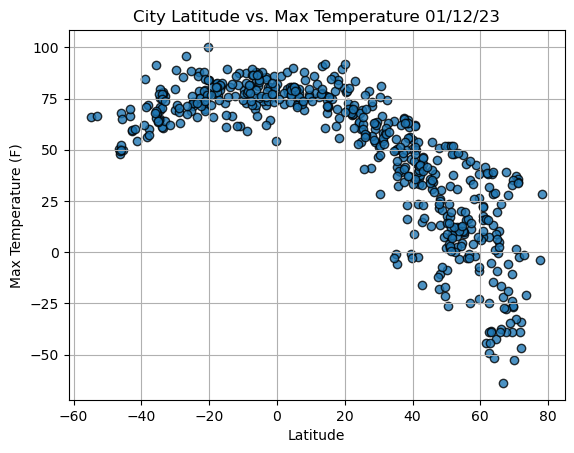

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

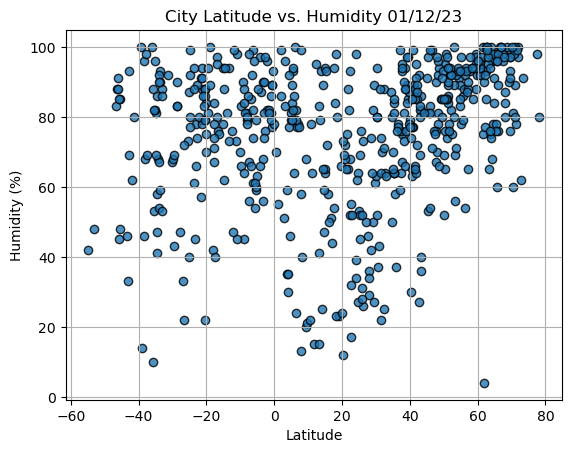

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

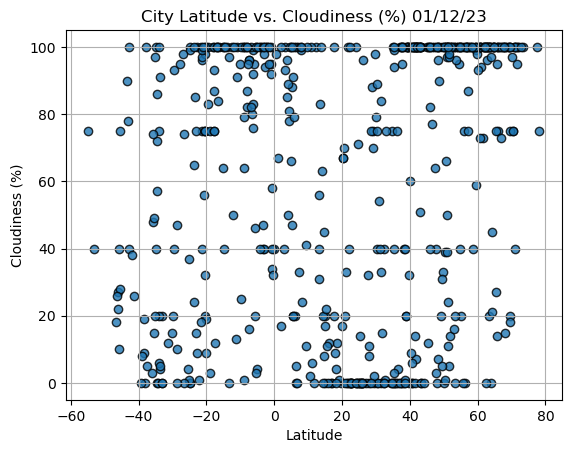

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

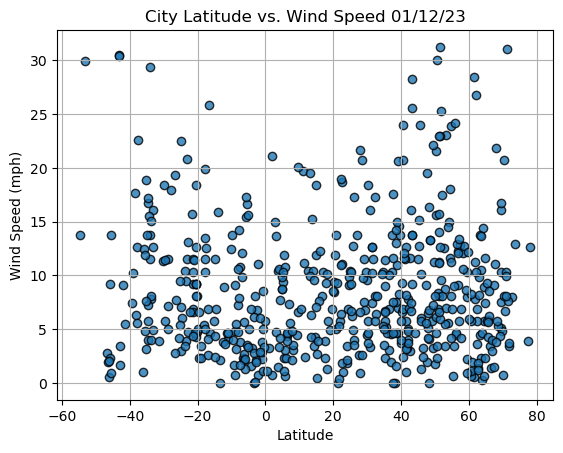

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aniche,50.3300,3.2535,51.76,95,100,21.54,FR,2023-01-12 18:41:32
1,Fortuna,40.5982,-124.1573,61.99,65,0,20.71,US,2023-01-12 18:41:32
2,Vardo,70.3705,31.1107,37.38,81,75,20.71,NO,2023-01-12 18:41:34
3,Tobermory,45.2501,-81.6665,35.96,97,100,12.75,CA,2023-01-12 18:41:34
4,Kapaa,22.0752,-159.3190,67.19,82,40,5.75,US,2023-01-12 18:41:35


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

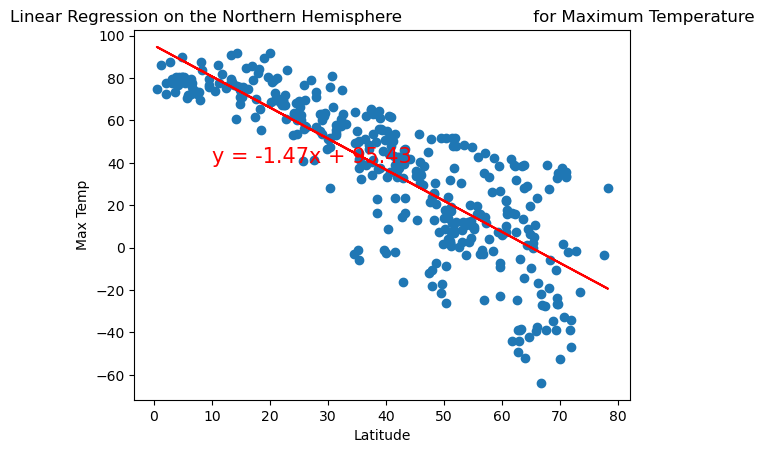

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

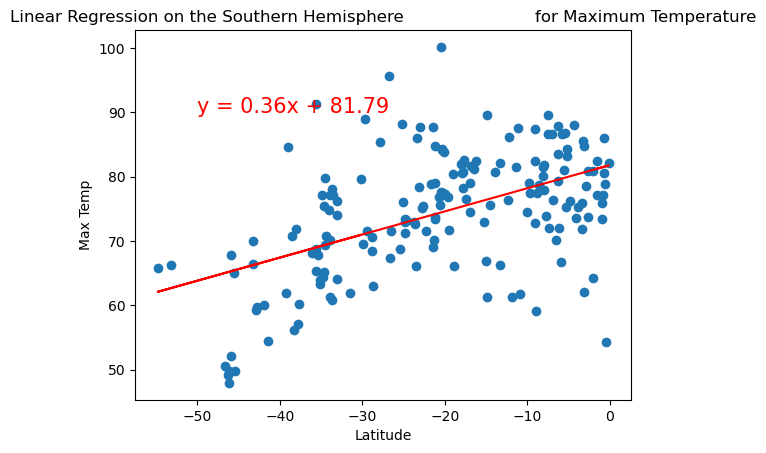

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

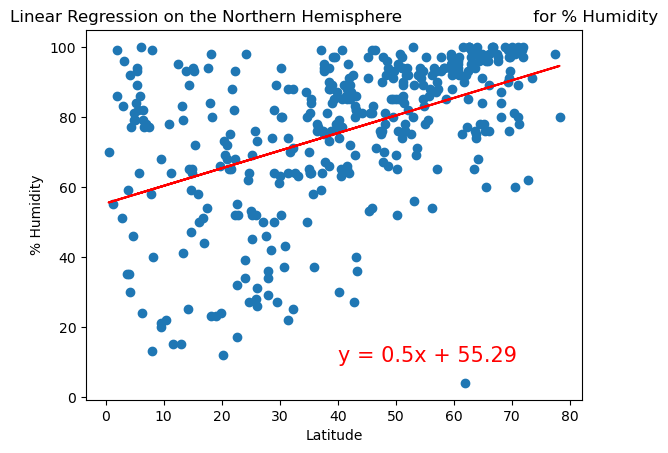

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

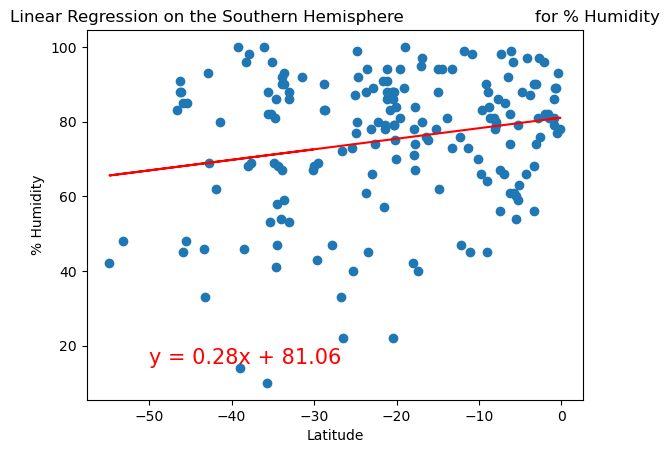

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

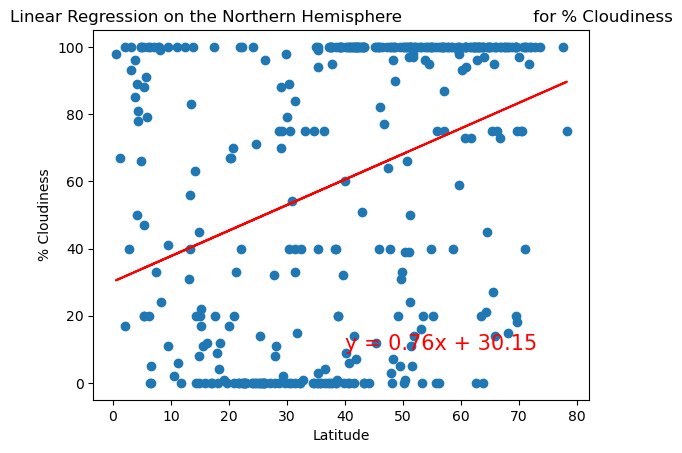

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

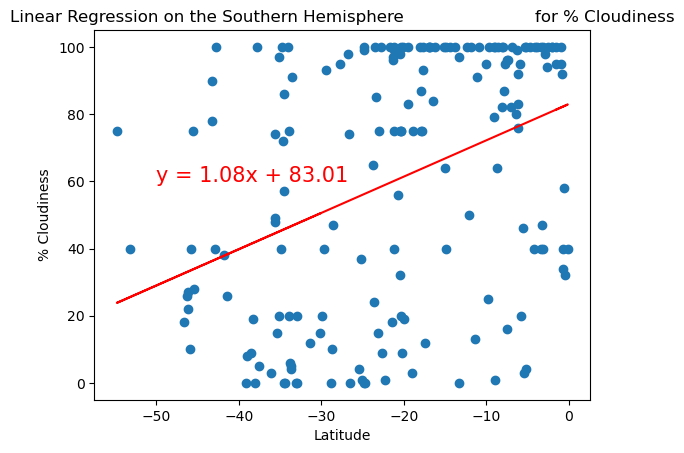

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

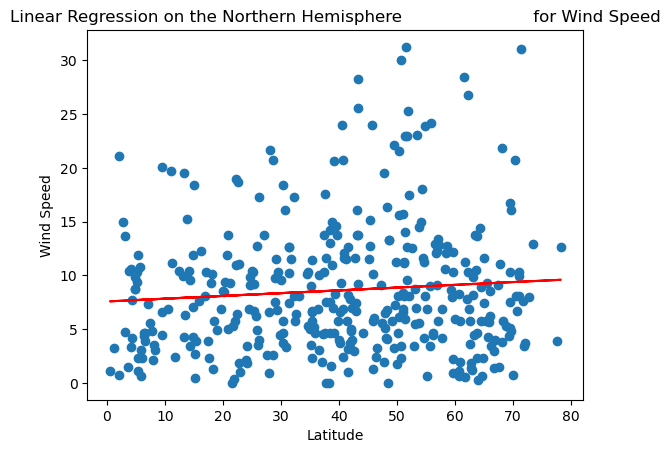

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

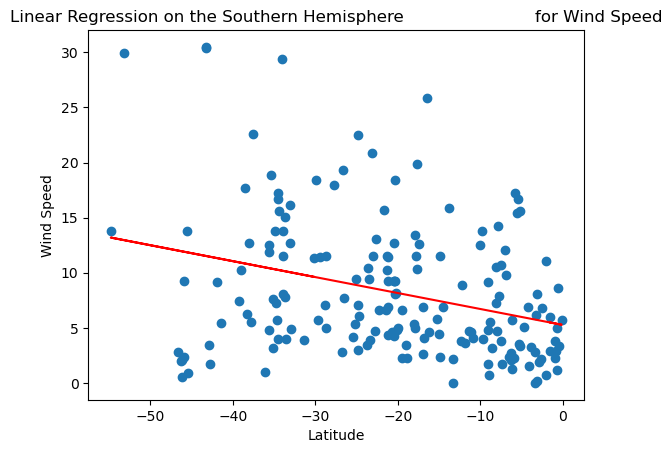

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))